In [1]:
import rastereasy

# Stack images

Two options

- Return a stacked image (function `stack`)
- Stack directly the original image (function `stack` with `inplace=True`)

Example by stacking an original image with its clusterised version

## 1) Return a stacked image (function `stack`)

### 1) read an image

In [2]:
names = {"NIR":8,"G":3,"CO" : 1,"SWIR2":11,"B": 2,"R":4,"RE1":5,"RE2":6,"RE3":7,"WA":9,"SWIR1":10,"SWIR3":12}
im1=rastereasy.Geoimage('./data/demo/sentinel.tif',names=names,history=True)


In [3]:
help(im1.stack)

Help on method stack in module rastereasy.rastereasy:

stack(
    im_to_stack,
    dtype=None,
    dest_name=None,
    inplace=False,
    reformat_names=False
) method of rastereasy.rastereasy.Geoimage instance
    Stack bands from another image onto this image (in-place).

    This method combines the bands from another image with the current image,
    modifying the current image to include all bands from both sources.

    Parameters
    ----------
    im_to_stack : Geoimage
        The image whose bands will be stacked onto this image.
        Should have the same spatial dimensions (rows, cols).

    dtype : str or None, optional
        The data type for the stacked image. If None, an appropriate type is
        determined based on the types of both input images.
        Common values: 'float64', 'float32', 'int32', 'uint16', 'uint8'.
        Default is None.

    dest_name : str, optional
        Path to save the stacked image. If None, the image is not saved.
        Default is

### 2) computing a clustering (for the example)

<Figure size 640x480 with 0 Axes>

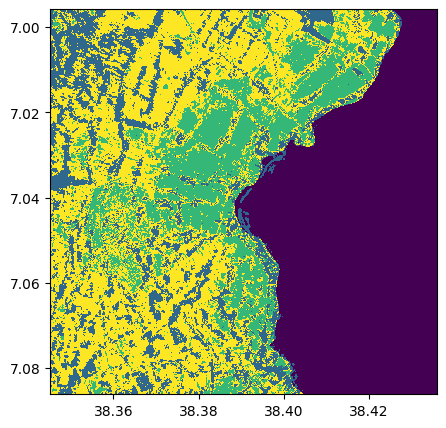

In [4]:
im_clust,_ = im1.kmeans(4)
im_clust.visu()


### 3) Stack the two images with `stack`

In [5]:
im_stacked=im1.stack(im_clust)
im_stacked.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 13
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int32
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'CO': 1, 'B': 2, 'G': 3, 'R': 4, 'RE1': 5, 'RE2': 6, 'RE3': 7, 'NIR': 8, 'WA': 9, 'SWIR1': 10, 'SWIR2': 11, 'SWIR3': 12, '1': 13}




## 2) Stack directly the original image (function `stack` with `inplace=True`)

In [6]:
im1.info()
im1.stack(im_clust, inplace=True)
im1.info()

- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 12
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int16
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'CO': 1, 'B': 2, 'G': 3, 'R': 4, 'RE1': 5, 'RE2': 6, 'RE3': 7, 'NIR': 8, 'WA': 9, 'SWIR1': 10, 'SWIR2': 11, 'SWIR3': 12}

--- History of modifications---
[2025-06-04 15:30:31] - Read image ./data/demo/sentinel.tif


- Size of the image:
   - Rows (height): 1000
   - Cols (width): 1000
   - Bands: 13
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (7.04099599, 38.39058840)
- Driver: GTiff
- Data type: int32
- Projection system: EPSG:32637
- Nodata: -32768.0

- Given names for spectral bands: 
   {'CO': 1, 'B': 2, 'G': 3, 'R': 4, 'RE1': 5, 'RE2': 6, 'RE

# Create Stack from files

You can use the `rastereasy.files2stack` function to stack different files

In [7]:
help(rastereasy.files2stack)

Help on function files2stack in module rastereasy.rastereasy:

files2stack(
    imagefile_path,
    resolution=None,
    names='origin',
    dest_name=None,
    ext='jp2',
    history=False
)
    Create a stacked Geoimage from multiple single-band images.

    This function creates a multi-band Geoimage by stacking individual images,
    either from a list of image paths or from all images in a directory.
    All input images should have 1 band each.

    Parameters
    ----------
    imagefile_path : str or list of str
        - If a list of strings: paths to image files to stack (e.g., ['image1.jp2', 'image2.jp2', ...])
        - If a string: path to a directory containing images with the specified extension
    resolution : float, optional
        Resolution to which all images will be resampled. If None, all images must
        have the same resolution already.
        Default is None.
    names : dict or str, optional
        How to name the spectral bands in the stack:
        - 

### 1) By specifying the list of files

In [8]:
list_tif=['./data/demo/tostack/G5_B2.tif','./data/demo/tostack/G5_B3.tif','./data/demo/tostack/G5_B4.tif','./data/demo/tostack/G5_B8.tif']
resolution=10

stack1=rastereasy.files2stack(list_tif,resolution=resolution)
stack1.info()

- Size of the image:
   - Rows (height): 2370
   - Cols (width): 3144
   - Bands: 4
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (47.60615500, -2.57780166)
- Driver: GTiff
- Data type: uint16
- Projection system: EPSG:32630

- Given names for spectral bands: 
   {'G5_B2': 1, 'G5_B3': 2, 'G5_B4': 3, 'G5_B8': 4}




### 2) By giving the folder and extension of contained files

In [9]:
rep='./data/demo/tostack/'
ext='tif'
stack2=rastereasy.files2stack(rep,ext=ext,dest_name='./data/results/stack/stack.tif',resolution=resolution)
stack2.info()
# Check the identify between stacked images
print('Differences between images : ', (stack2-stack1).abs().sum())


- Size of the image:
   - Rows (height): 2370
   - Cols (width): 3144
   - Bands: 4
- Spatial resolution: 10.0  meters / degree (depending on projection system)
- Central point latitude - longitude coordinates: (47.60615500, -2.57780166)
- Driver: GTiff
- Data type: uint16
- Projection system: EPSG:32630

- Given names for spectral bands: 
   {'G5_B2': 1, 'G5_B3': 2, 'G5_B4': 3, 'G5_B8': 4}


Differences between images :  0


<Figure size 640x480 with 0 Axes>

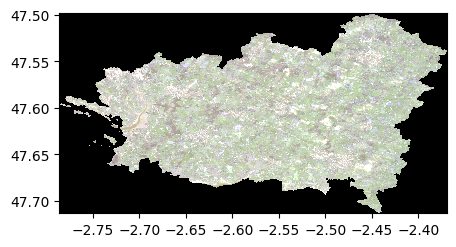

In [10]:
stack2.colorcomp()